In [1]:
stopwords = [
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', 
    '고', '면', '며', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', 
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '일', '문제', '경우', '부분', 
    '내용', '결과', '자체', '가지',
    '않았어요', '있었어요', '했어요', '했는데요', '있는데요', '입니다', '합니다',
    '했다', '한다', '있다', '없다', '되다', '같다', '네요', '어요', '아요','이다','다','아니다',
    '것', '수', '좀', '너무', '정말', '많이', '조금',
    '그리고', '그러나', '하지만', '그래서', '또한', '그런데',
    '뿐', '대로', '만큼', '만', '지', '따름', '나름', '김에', '터', '너무', '어요'
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니', '않다', '안되다','안','나다','그냥'
]

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df["text"])
X_test = tfidf.transform(test_df["text"])

# 모델 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("=== TF-IDF Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== TF-IDF Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

NameError: name 'train_df' is not defined

In [ ]:
new_texts = ["괜찮았어요", "그냥저냥"]
X_new = vectorizer.transform(new_texts)
pred = model.predict(X_new)
proba = model.predict_proba(X_new)

for i, text in enumerate(new_texts):
    print(f"문장: {text}")
    print(f"예측: {pred[i]}, 확률: {proba[i]}")

문장: 괜찮았어요
예측: 0, 확률: [0.57997463 0.42002537]
문장: 그냥저냥
예측: 0, 확률: [0.54664501 0.45335499]


In [9]:
# 5. 저장
joblib.dump(model, 'Logistic_model.pkl')
joblib.dump(vectorizer, 'Logistic_tfidf_vectorizer.pkl')
print("✅ 모델 및 벡터라이저 저장 완료!")

✅ 모델 및 벡터라이저 저장 완료!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 1~2그램 적용 (ex: "맛있어요", "정말 맛있어요")
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_ng = ngram_vectorizer.fit_transform(train_df["text"])
X_test_ng = ngram_vectorizer.transform(test_df["text"])

# 모델 학습
model = MultinomialNB()
model.fit(X_train_ng, y_train)

# 예측 및 평가
y_pred_ng = model.predict(X_test_ng)

print("=== N-gram Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_ng))
print("\n=== N-gram Classification Report ===")
print(classification_report(y_test, y_pred_ng, digits=3))


In [ ]:
# TF-IDF + N-gram (1~2그램)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
# !pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 불러오기
train_df = pd.read_csv("ratings_train.csv", encoding="utf-8-sig")
test_df = pd.read_csv("ratings_test.csv", encoding="utf-8-sig")

# 2. TF-IDF 벡터화 + N-gram(1,2)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])
y_train = train_df["label"]
y_test = test_df["label"]

# 3. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. 예측 및 성능 평가
y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

# 5. 중요 단어 추출
feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_  # shape: (3, n_features)

# 클래스별 상위 단어 추출
topn = 10
weights = {}
for idx, class_label in enumerate(model.classes_):  # -1, 0, 1
    top_indices = np.argsort(coef[idx])[::-1][:topn]
    weights[class_label] = pd.DataFrame({
        'word': feature_names[top_indices],
        'weight': coef[idx][top_indices]
    })

# 6. 시각화 준비용 데이터프레임 생성
df_plot = pd.concat(
    [df.assign(label=str(label)) for label, df in weights.items()],
    axis=0
)

# 7. 시각화: 클래스별 단어 중요도
plt.rcParams['font.family'] = 'Malgun Gothic'  # Mac이라면 AppleGothic, Windows면 Malgun Gothic
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
labels = ['-1 (부정)', '0 (중립)', '1 (긍정)']
color_dict = {'-1': '#e74c3c', '0': '#f1c40f', '1': '#2ecc71'}

for i, label in enumerate(['-1', '0', '1']):
    subset = df_plot[df_plot['label'] == label]
    sns.barplot(
        ax=axes[i],
        data=subset,
        y='word',
        x='weight',
        color=color_dict[label]
    )
    axes[i].set_title(f"감성 {labels[i]} 상위 단어")
    axes[i].set_xlabel("가중치(weight)")
    axes[i].set_ylabel("단어")

plt.tight_layout()
plt.show()


c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


=== Confusion Matrix ===
[[187  40]
 [ 68 204]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       227
           1       0.84      0.75      0.79       272

    accuracy                           0.78       499
   macro avg       0.78      0.79      0.78       499
weighted avg       0.79      0.78      0.78       499



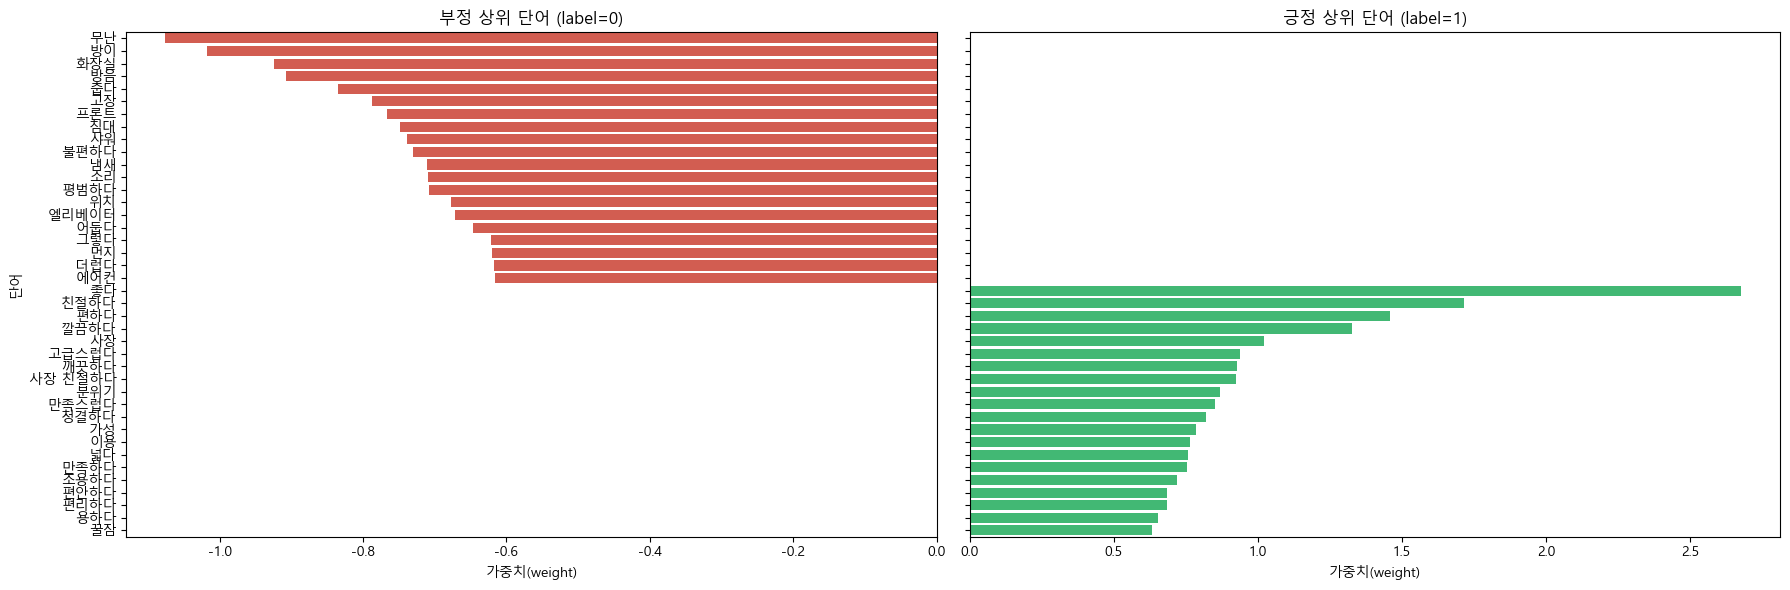

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

from konlpy.tag import Okt
import warnings

# 1. 데이터 불러오기
train_df = pd.read_csv("ratings_train.csv", encoding="utf-8-sig")
test_df = pd.read_csv("ratings_test.csv", encoding="utf-8-sig")

# ✅ 2. 긍정(1)과 부정(0)만 남기고, 그 외 중립 제거
train_df = train_df[train_df["label"].isin([0, 1])].copy()
test_df = test_df[test_df["label"].isin([0, 1])].copy()
okt = Okt()
def tokenize(text):
    try:
        return [word for word, pos in okt.pos(text, stem=True) 
                if pos in ['Noun', 'Adjective'] 
                and word not in stopwords
                and len(word) > 1
                ]
    except:
        return []

# 3. 벡터화
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])
y_train = train_df["label"]
y_test = test_df["label"]

# 4. 모델 학습 (클래스 가중치 balanced)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=2))

# 6. 중요 단어 추출 (이진 분류는 coef_[0] 사용)
feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_[0]

topn = 20
top_pos_idx = np.argsort(coef)[::-1][:topn]
top_neg_idx = np.argsort(coef)[:topn]

df_pos = pd.DataFrame({'word': feature_names[top_pos_idx], 'weight': coef[top_pos_idx]})
df_neg = pd.DataFrame({'word': feature_names[top_neg_idx], 'weight': coef[top_neg_idx]})

# 7. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # Mac이면 AppleGothic
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(ax=axes[0], data=df_neg, y='word', x='weight', color='#e74c3c')
axes[0].set_title("부정 상위 단어 (label=0)")
axes[0].set_xlabel("가중치(weight)")
axes[0].set_ylabel("단어")

sns.barplot(ax=axes[1], data=df_pos, y='word', x='weight', color='#2ecc71')
axes[1].set_title("긍정 상위 단어 (label=1)")
axes[1].set_xlabel("가중치(weight)")

plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

# 워드클라우드용 단어 + 가중치 딕셔너리 만들기
word_weights = {
    label: dict(zip(df['word'], df['weight']))
    for label, df in weights.items()
}
print(word_weights.keys())

# 워드클라우드 그리기 함수
def draw_wordcloud(word_weight_dict, title, color):
    wc = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        background_color='white',
        colormap=color,
        width=800,
        height=400
    )
    wc.generate_from_frequencies(word_weight_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# 클래스별 워드클라우드 출력
draw_wordcloud(word_weights[0], '부정 감성 주요 단어', 'Reds')
draw_wordcloud(word_weights[1], '긍정 감성 주요 단어', 'Greens')


dict_keys([])


In [69]:
# 새 문장 리스트
df = pd.read_csv('1_1400_output_partial.csv')

sentence = df['sentence']

# 벡터화 (학습한 vectorizer 사용)
X_new = vectorizer.transform(sentence)

# 예측 수행
predictions = model.predict(X_new)
probs = model.predict_proba(X_new)

# 결과 출력
# for i, text in enumerate(sentence):
#     print(f"문장: {text}")
#     print(f"예측 감성: {predictions[i]} (확률: {probs[i]})\n")
threshold = 0.6
for i, text in enumerate(sentence):
    prob_pos = probs[i][1]
    if prob_pos >= threshold:
        label = "긍정"
    elif prob_pos <= 1 - threshold:
        label = "부정"
    else:
        label = "모호"
    
    print(f"문장: {text}")
    print(f"예측 감성: {label} (긍정 확률: {prob_pos:.3f})\n")

문장: 위치 접근성 시외터미널 바로 뒤 이미 시내버스 정류장이랑 도보 분 정도도 보전용 룸으로 굉장히 저렴한 가격으로 예약 함자 차 없어도 전혀 불편함 없음 층으로 주셨는데 창문 열면 탁 트인 시티 부임 주변 편의 편의점 식당 바로 근처에 많음 인테리어 시설 새 건물은 아니지만 관리 상태 괜찮음 객실에 들어갔을 때 담배 냄새 전혀 안 나고 쾌적했음 안마의자까지 가벽 면 봄 화장 솜 스킨로션 세세한 벗까지 일회용 어메니티 있어서 몸만 가도 될 정도 침대 폭신하고 특히 침구랑 수건 깨끗했음 관리 및 침구 청소상태 양호함 비품 욕실에 샴푸린스바디워시회용 치약 비누 가 본 곳 중에 어메니티 종류별로 꼼꼼하게 있기로는 최고 소음 개실에 손님 있던 것 같은데 너무 조용했음 총평 평일에 이 가격에 이런 퀄리티가 성비 가심비 둘 다 최고 층에 빵 다양하게 있어서 체크인할 때 챙겨 먹고 체크아웃할 때도 야무지게 챙겨서 속까지 든든했어요 재방문의 사 카운터분도 굉장히 친절하시고 재방문의 사 프로임
예측 감성: 모호 (긍정 확률: 0.484)

문장: 득템한 느낌이네요 고속 터미널 옆에 이런 곳이 있을 줄 몰랐습니다 터미널 근처라서 비쌀 줄 알았는데 가격도 착하고 가격이 착하면 상태가 안 좋을 줄 알았는데 기대 이상입니다 물론 낙후된 느낌이 들지만 담배 냄새 안 나고 깔끔합니다 궁에 예약했는데 주차 자리가 없어서 문의했더니 바로 앞의 예 주차 직원분이에 숙소를 줌 두 모텔이 같은 사장님 같습니다 직원분도 친절하시고 넓은 침대에 베개 개 생수개 음료수 개 화장실과 샤워실 분리 세면대 따로 특이한 건 충전기가 벽에 매달려 있다는 것 그리고 퇴실 시간이 오후 시까지 영화 보고 나왔네요 쉬러 왔는데 정말 푹 쉬고 갑니다 다음에 또 오겠습니다
예측 감성: 모호 (긍정 확률: 0.523)

문장: 엄청 깨끗하고 친절한 곳입니다 갑자기 출장 오게 돼서 잡은 모텔인데 주변 모텔은 오래되고 낡은 건물인 방면 여기는 실내외 정말 괜찮은 모텔입니다 거기에 가성비까지 가격도 엄청 저렴하고 주차시설도 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_test, y_pred):
    return {
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

results = []

# 첫 번째 모델: CountVectorizer + Naive Bayes
model1 = MultinomialNB()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
results.append(evaluate_model('Count + NB', y_test1, y_pred1))

# 두 번째 모델: TfidfVectorizer + LogisticRegression
model2 = LogisticRegression(max_iter=1000, class_weight='balanced')
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
results.append(evaluate_model('TF-IDF + LR', y_test2, y_pred2))

# 세 번째 모델: 형태소분석 + 불용어 + 1글자 제거
model3 = LogisticRegression(max_iter=1000, class_weight='balanced')
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
results.append(evaluate_model('형태소 + 불용어 + LR', y_test3, y_pred3))

df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    sns.barplot(x='model', y=metric, data=df_results)
    plt.title(f'📊 {metric.capitalize()} 비교')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()